# Visualizando Ranks

Observando distribuição dos canais com melhor desempenho para os chb do 01 ao 12.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

file_range = [
    '01', '02', '03', '04', '05', '07', '08', '10', '11', '12',
    '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24'
]

dataframe_list = [pd.read_csv(f'./chb{number}/knn_descr_channel_rank.csv') for number in file_range]

ranks_DF = pd.concat(dataframe_list, ignore_index=True)
ranks_DF

,mean,std,50%,chb,channel
0,0.889615,0.026562,0.888462,1,0
1,0.919615,0.020802,0.915385,1,1
2,0.911154,0.019884,0.907692,1,2
3,0.936154,0.016000,0.934615,1,3
4,0.886538,0.025436,0.880769,1,4
...,...,...,...,...,...
373,0.927211,0.014321,0.931973,24,13
374,0.942177,0.016294,0.945578,24,14
375,0.890136,0.023594,0.887755,24,15
376,0.902041,0.021101,0.901361,24,16


## Observando histograma com `ranks_DF` filtrado

(241, 5)

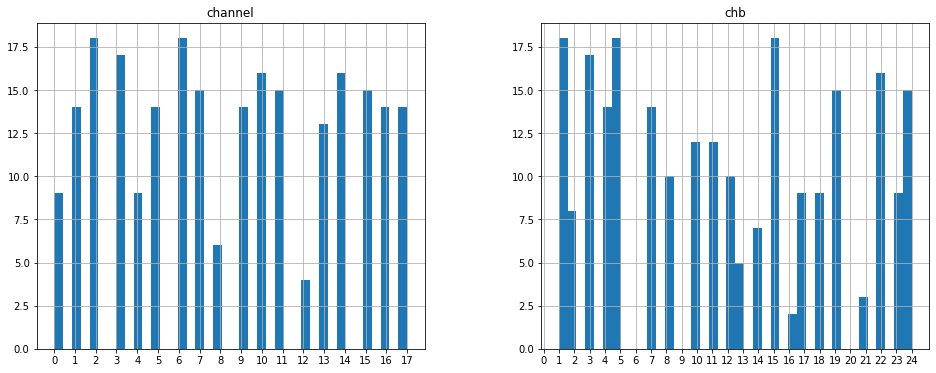

In [2]:
mean_over_85_percent = ranks_DF.query('mean >= 0.85')

histogram1 = mean_over_85_percent.hist(column=['channel', 'chb'], bins=40, figsize=(16, 6))
histogram1[0, 0].set_xticks(range(18))
histogram1[0, 1].set_xticks(range(25))

mean_over_85_percent.shape

(136, 5)

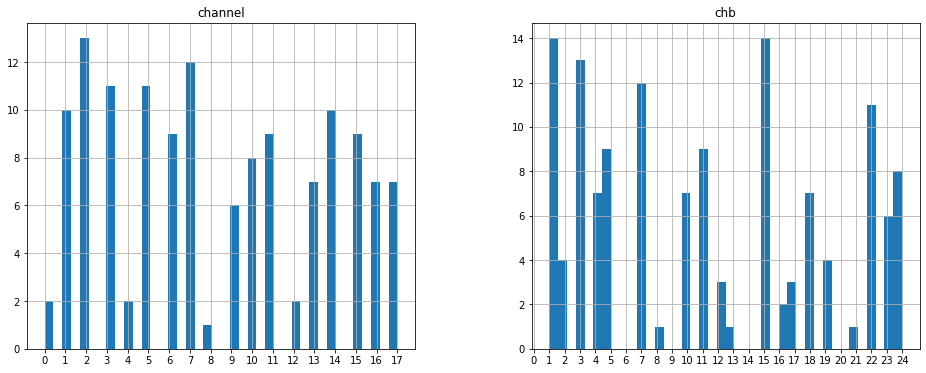

In [3]:
mean_over_90_percent = ranks_DF.query('mean >= 0.90')

histogram2 = mean_over_90_percent.hist(column=['channel', 'chb'], bins=40, figsize=(16, 6))
histogram2[0, 0].set_xticks(range(18))
histogram2[0, 1].set_xticks(range(25))

mean_over_90_percent.shape

(41, 5)

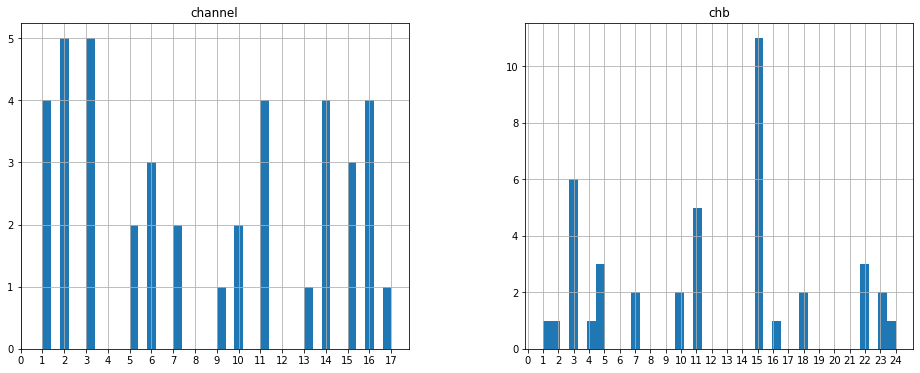

In [4]:
mean_over_95_percent = ranks_DF.query('mean >= 0.95')

histogram3 = mean_over_95_percent.hist(column=['channel', 'chb'], bins=40, figsize=(16, 6))
histogram3[0, 0].set_xticks(range(18))
histogram3[0, 1].set_xticks(range(25))

mean_over_95_percent.shape

## Observando histograma com _N_ primeiros de cada chb

(189, 5)

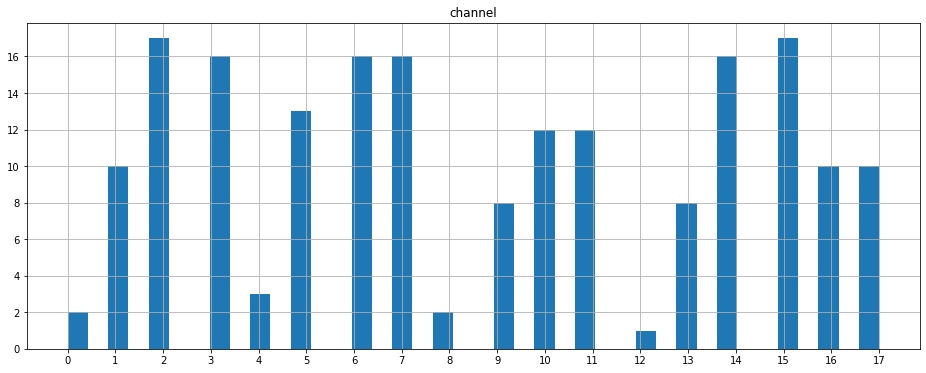

In [5]:
top9_per_dataframe_list = [top9.sort_values(by='mean', ascending=False).head(9) for top9 in dataframe_list]

rank_top9_DF = pd.concat(top9_per_dataframe_list, ignore_index=True)

rank_top9_DF.hist(column='channel', bins=40, figsize=(16, 6))[0, 0].set_xticks(range(18))

rank_top9_DF.shape

(126, 5)

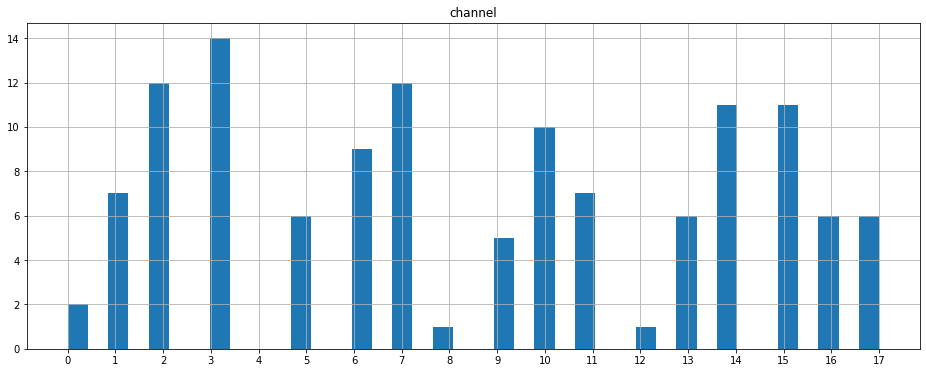

In [6]:
top6_per_dataframe_list = [top6.sort_values(by='mean', ascending=False).head(6) for top6 in dataframe_list]

rank_top6_DF = pd.concat(top6_per_dataframe_list, ignore_index=True)

rank_top6_DF.hist(column='channel', bins=40, figsize=(16, 6))[0, 0].set_xticks(range(18))

rank_top6_DF.shape

(63, 5)

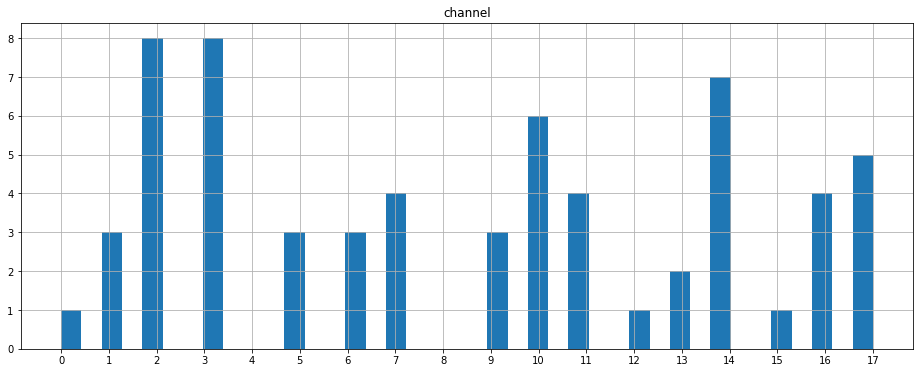

In [7]:
top3_per_dataframe_list = [top3.sort_values(by='mean', ascending=False).head(3) for top3 in dataframe_list]

rank_top3_DF = pd.concat(top3_per_dataframe_list, ignore_index=True)

rank_top3_DF.hist(column='channel', bins=40, figsize=(16, 6))[0, 0].set_xticks(range(18))

rank_top3_DF.shape